# 형상인자 15개 Correlationshipe 분석후 feature selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp


In [79]:
path = './factor table/total_xy_factor_table.csv'

df = pd.read_csv(path)


In [65]:
path = './factor table/test1_xy_factor_table.csv'
df = pd.read_csv(path)
path = './factor table/test2_xy_factor_table.csv'
df = pd.read_csv(path)



In [55]:
df

,Unnamed: 0,case,L_pre,A_pre,V_pre,xyratio_pre,L_blow,A_blow,V_blow,xyratio_blow,y_blow/y_pre,L_blow/L_pre,A_blow/A_pre,V_blow/V_pre,bot_len,side_len,top_len
0,0,t1_dp1,0.104965,0.003375,0.00051,1.297975,0.297487,0.014325,0.002950,3.745982,2.955304,2.834158,4.244589,5.785178,0.063912,0.229694,0.003881
1,1,t1_dp2,0.104965,0.003375,0.00051,1.297975,0.297424,0.014320,0.002948,3.747782,2.956612,2.833556,4.243136,5.780028,0.063073,0.230426,0.003925
2,2,t1_dp3,0.104965,0.003375,0.00051,1.297975,0.298458,0.014331,0.002950,3.746032,2.952801,2.843409,4.246218,5.785469,0.065099,0.229499,0.003860
3,3,t1_dp4,0.104965,0.003375,0.00051,1.297975,0.297550,0.014326,0.002952,3.751084,2.956104,2.834763,4.244731,5.789519,0.063604,0.230037,0.003909
4,4,t1_dp5,0.104965,0.003375,0.00051,1.297975,0.297495,0.014327,0.002951,3.744040,2.955551,2.834237,4.245096,5.787312,0.063805,0.229800,0.003889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,t1_dp96,0.104965,0.003375,0.00051,1.297975,0.297422,0.014332,0.002954,3.745282,2.956677,2.833539,4.246675,5.792656,0.061978,0.231620,0.003824
96,96,t1_dp97,0.104965,0.003375,0.00051,1.297975,0.297373,0.014327,0.002951,3.744417,2.956935,2.833074,4.245152,5.786224,0.063223,0.230315,0.003835
97,97,t1_dp98,0.104965,0.003375,0.00051,1.297975,0.297406,0.014326,0.002950,3.744634,2.956196,2.833393,4.244857,5.785734,0.064970,0.228606,0.003830
98,98,t1_dp99,0.104965,0.003375,0.00051,1.297975,0.297379,0.014320,0.002948,3.745420,2.954344,2.833136,4.243090,5.780920,0.062249,0.231299,0.003831


In [66]:
feature_ = df.columns[6:]
drop_ = [1]
feature.shape

(11,)

In [80]:
feature_ = df.columns[2:]
drop_ = [1]
feature.shape

(11,)

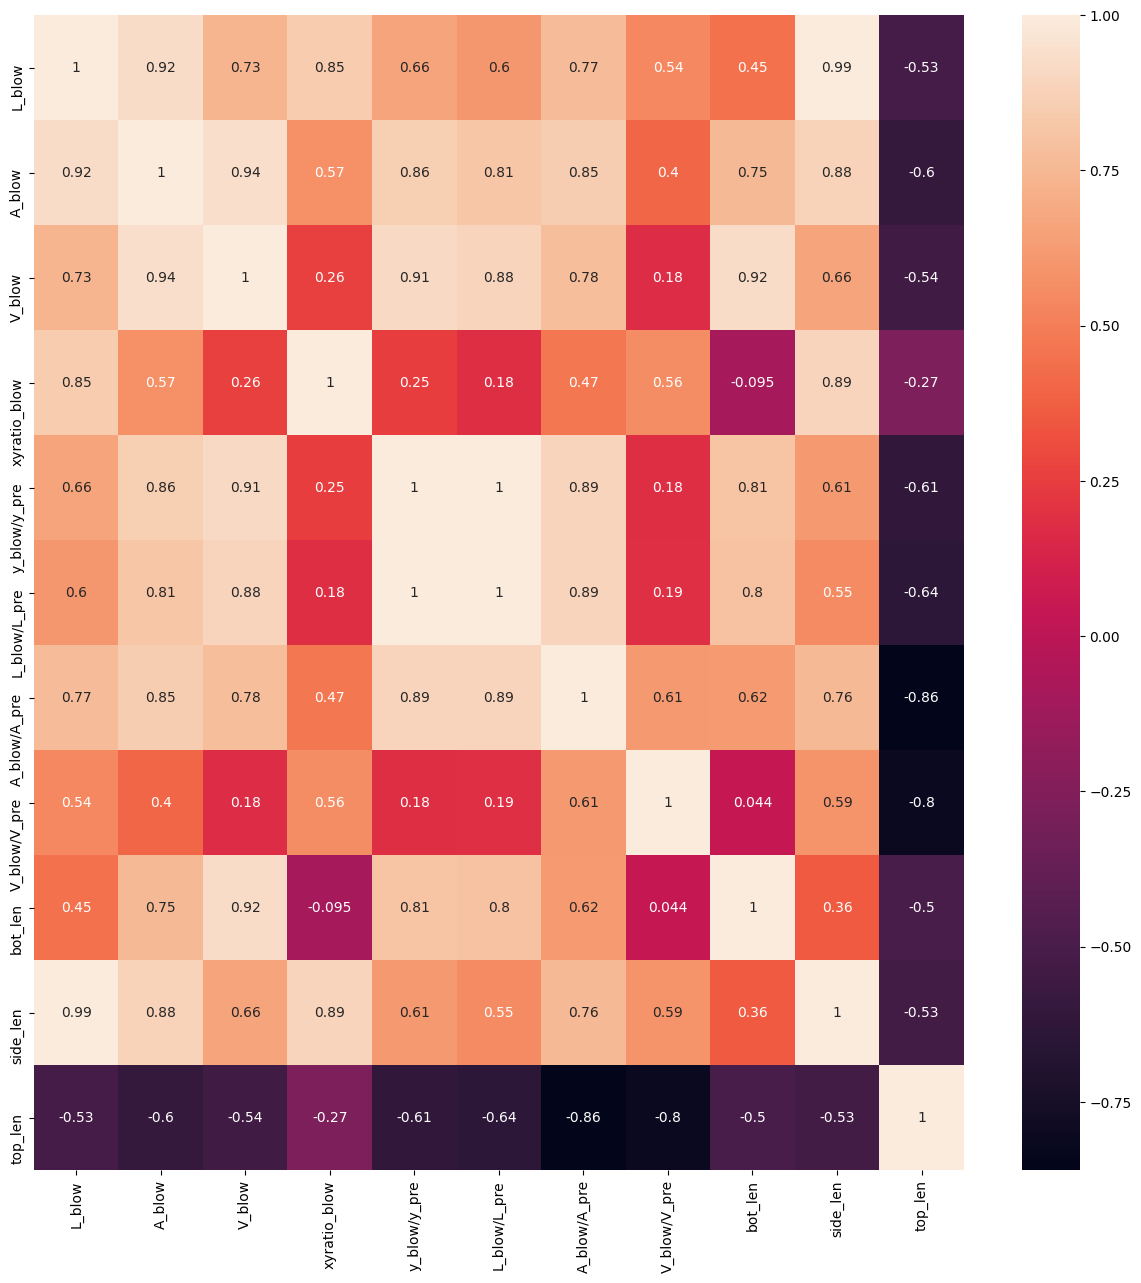

In [81]:
train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
sb.heatmap(pc,annot = True)
plt.show()

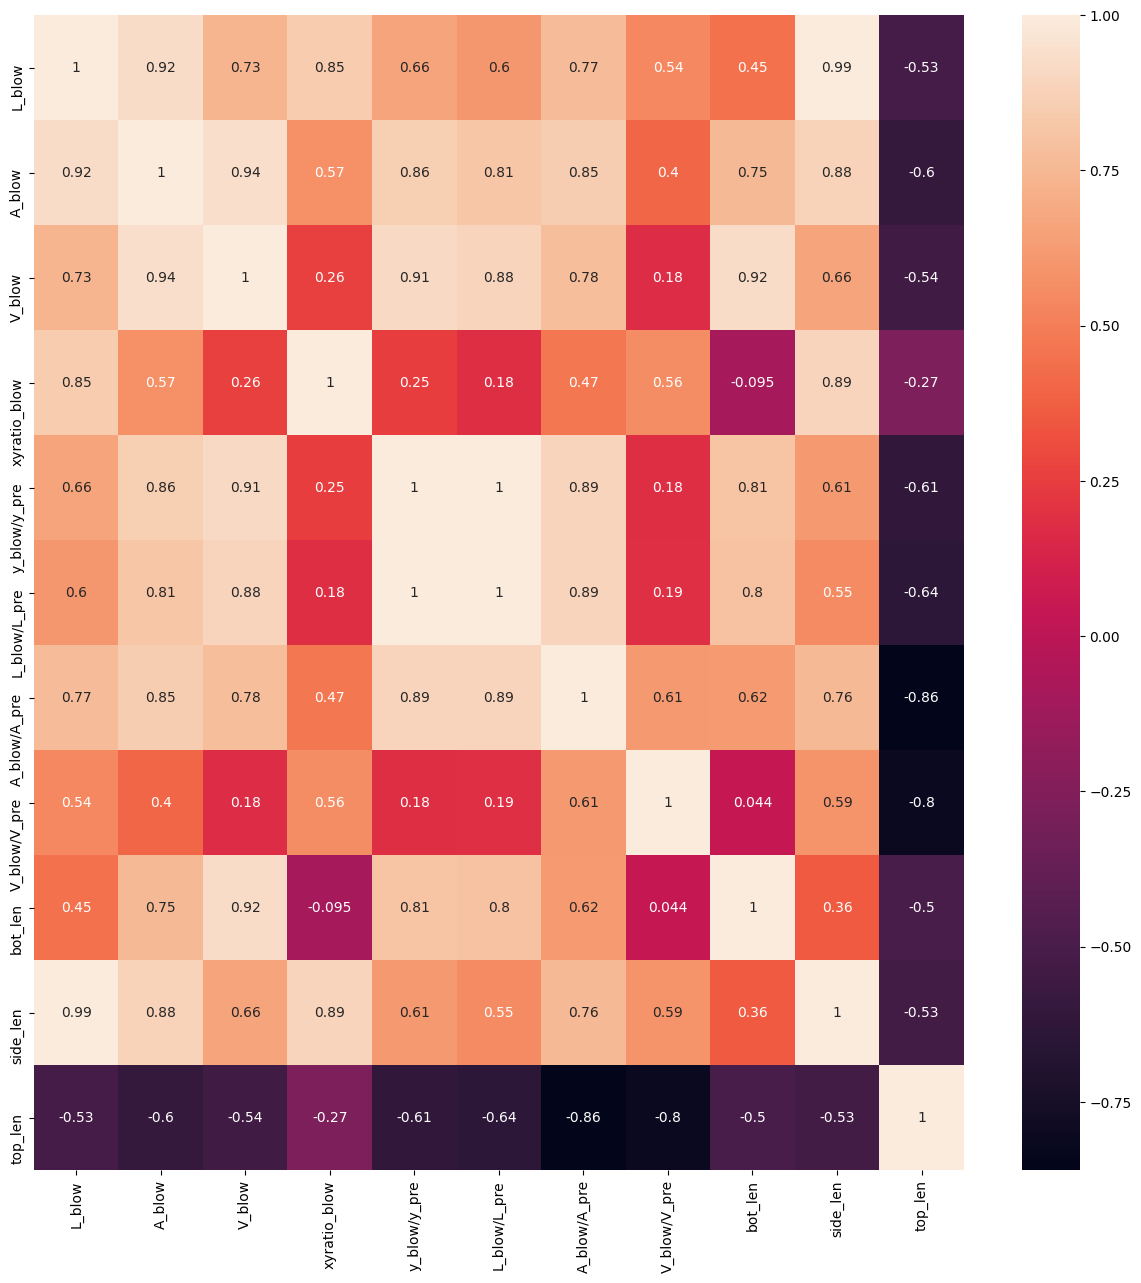

In [82]:
train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
sb.heatmap(pc,annot = True)
plt.show()

# 절대값 0.9 넘는애들만 살리고 나머지 0

In [85]:
threshold = 0
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

(11, 11)

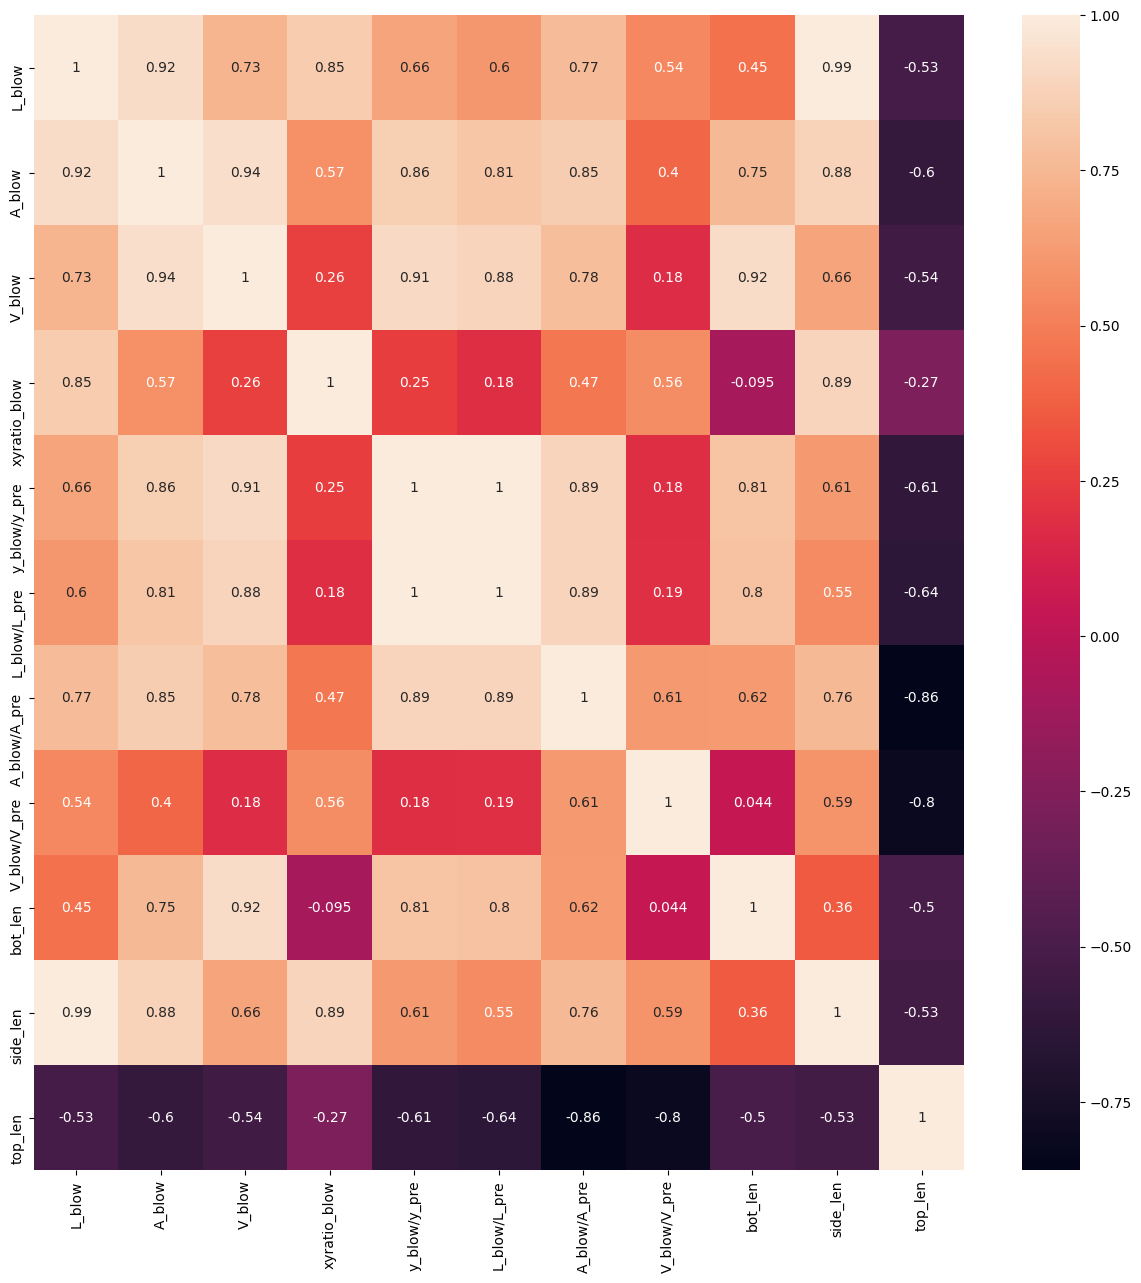

In [86]:
plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()

# test 1~5 별개 5개 분석

In [91]:
for k in range (5):
# test 1
    path = './factor table/test%d_xy_factor_table.csv'%(k+1)

    df = pd.read_csv(path)

    feature = df.columns[6:]
    feature.shape

    train_co = df[feature]

    train_co.corr()
    exec("pc%d =  train_co.corr()"%(k+1))
    plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

# threshold = 0.4
# feature_num = feature.shape[0]
# feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
# for i in range(feature_num):
#     for j in range(feature_num):
#         temp_pc = pc.iloc[i,j]
#         if (abs(temp_pc) < threshold):
#             feature_temp.iloc[i,j] = 0
    
# feature_temp.shape # (특징개수,특징개수)

# plt.figure(figsize = (15,15))
# sb.heatmap(feature_temp,annot = True)
# plt.show()


In [94]:
pc_total = (pc1+pc2+pc3+pc4+pc5)/5
pc_total = abs(pc_total)

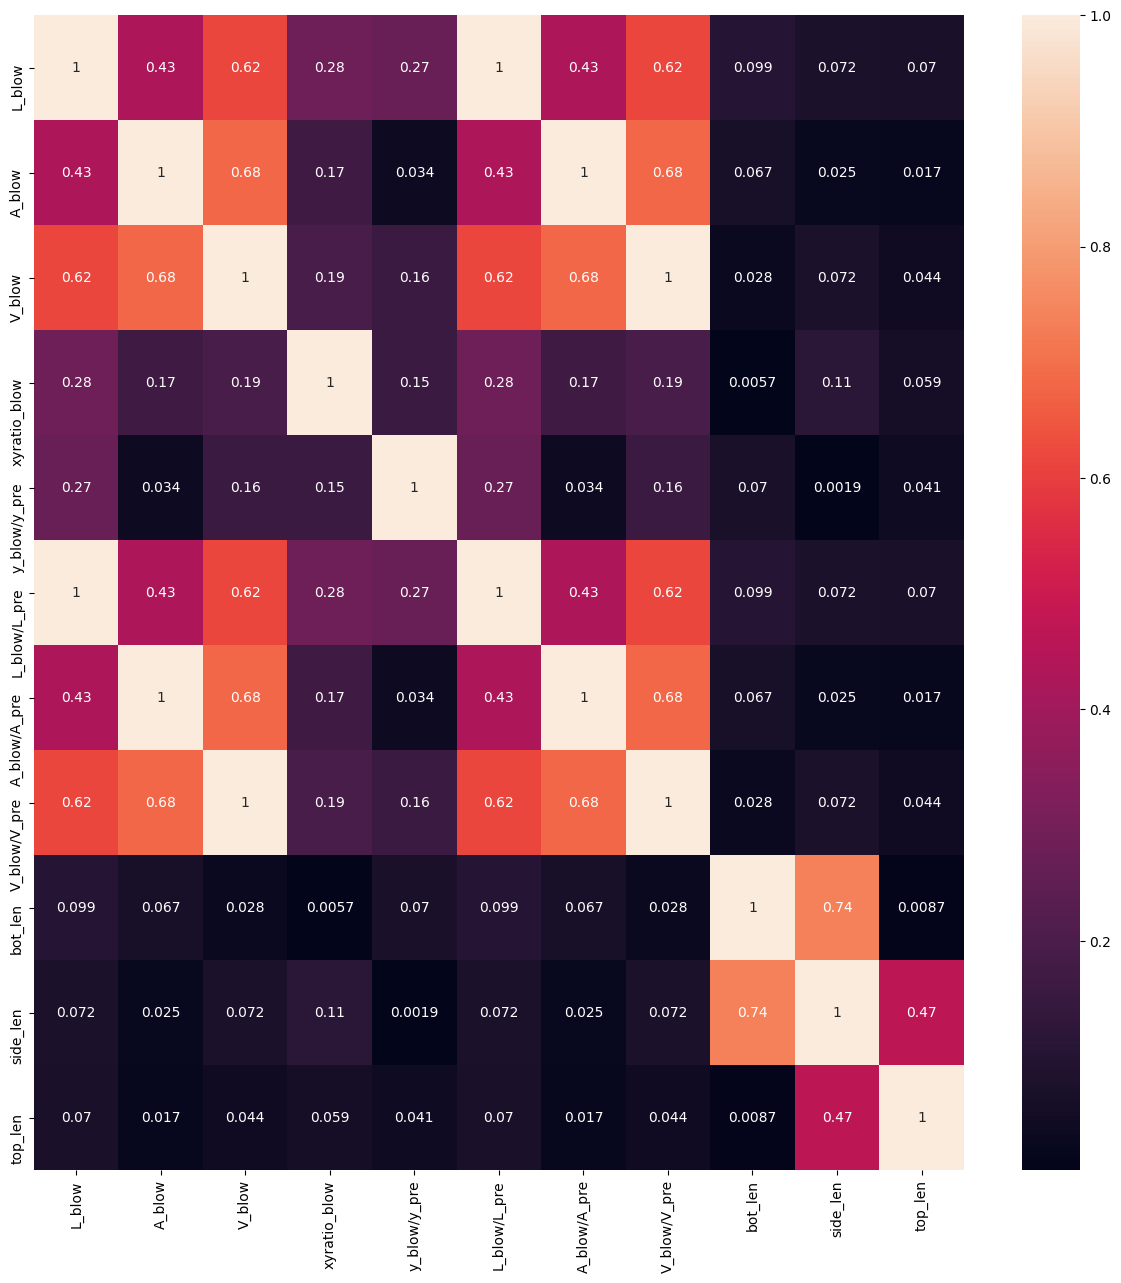

In [95]:
plt.figure(figsize = (15,15))
sb.heatmap(pc_total,annot = True)
plt.show()

<Figure size 1500x1500 with 0 Axes>

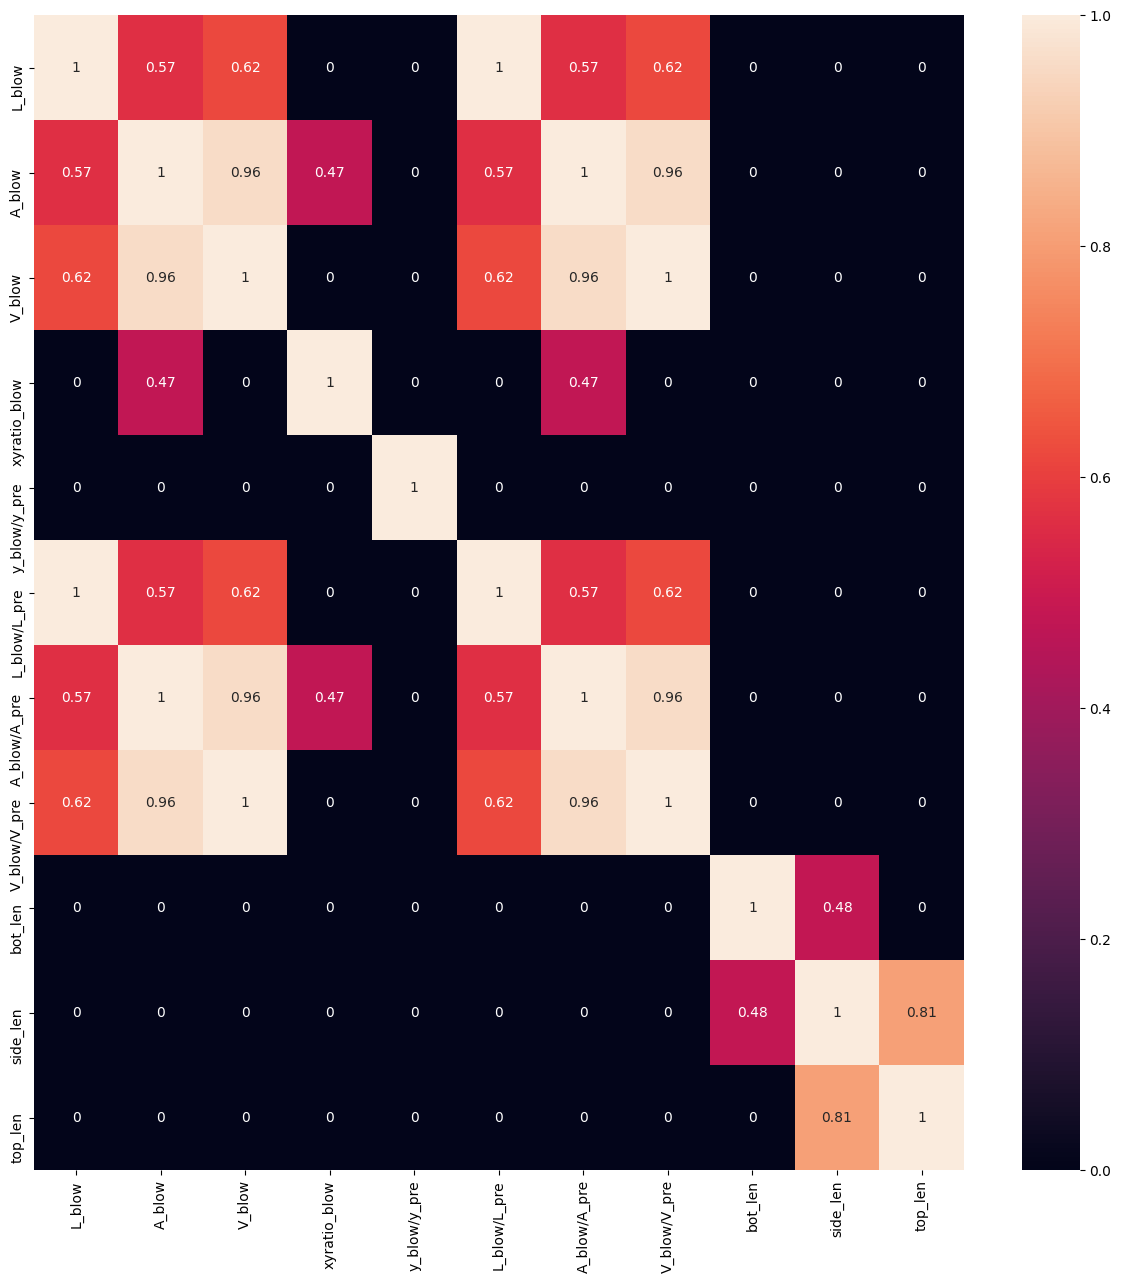

In [101]:
# test 2
path = './factor table/test2_xy_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns[6:]
feature.shape

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

threshold = 0.4

feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(abs(feature_temp),annot = True)
plt.show()


<Figure size 1500x1500 with 0 Axes>

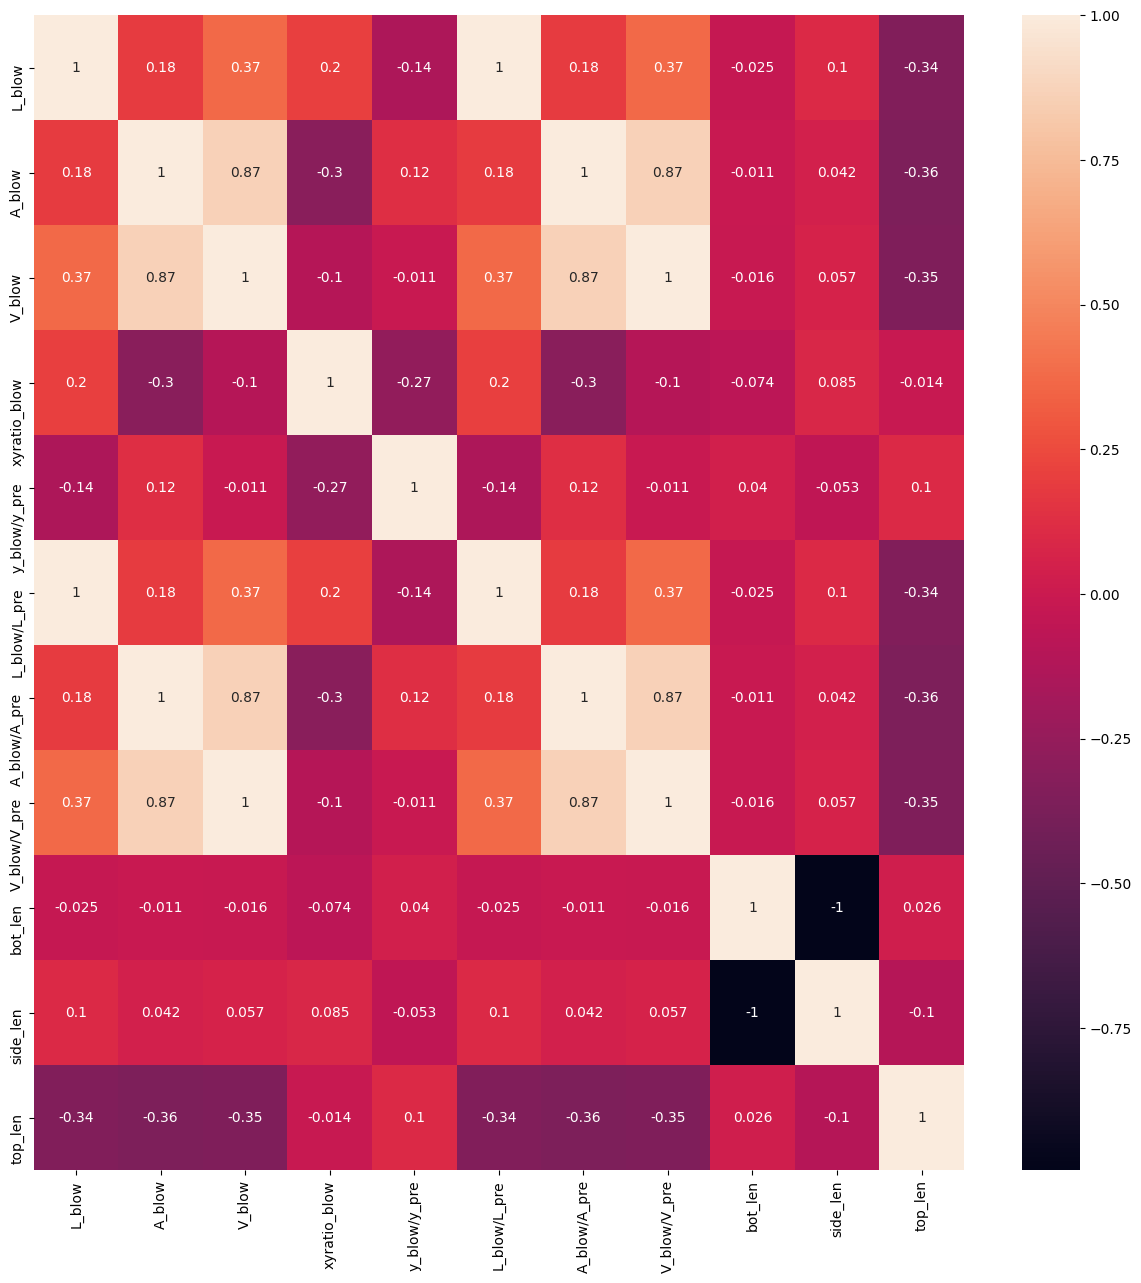

In [99]:
# test 3
path = './factor table/test3_xy_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns[6:]
feature.shape

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

threshold = 0.0
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()


<Figure size 1500x1500 with 0 Axes>

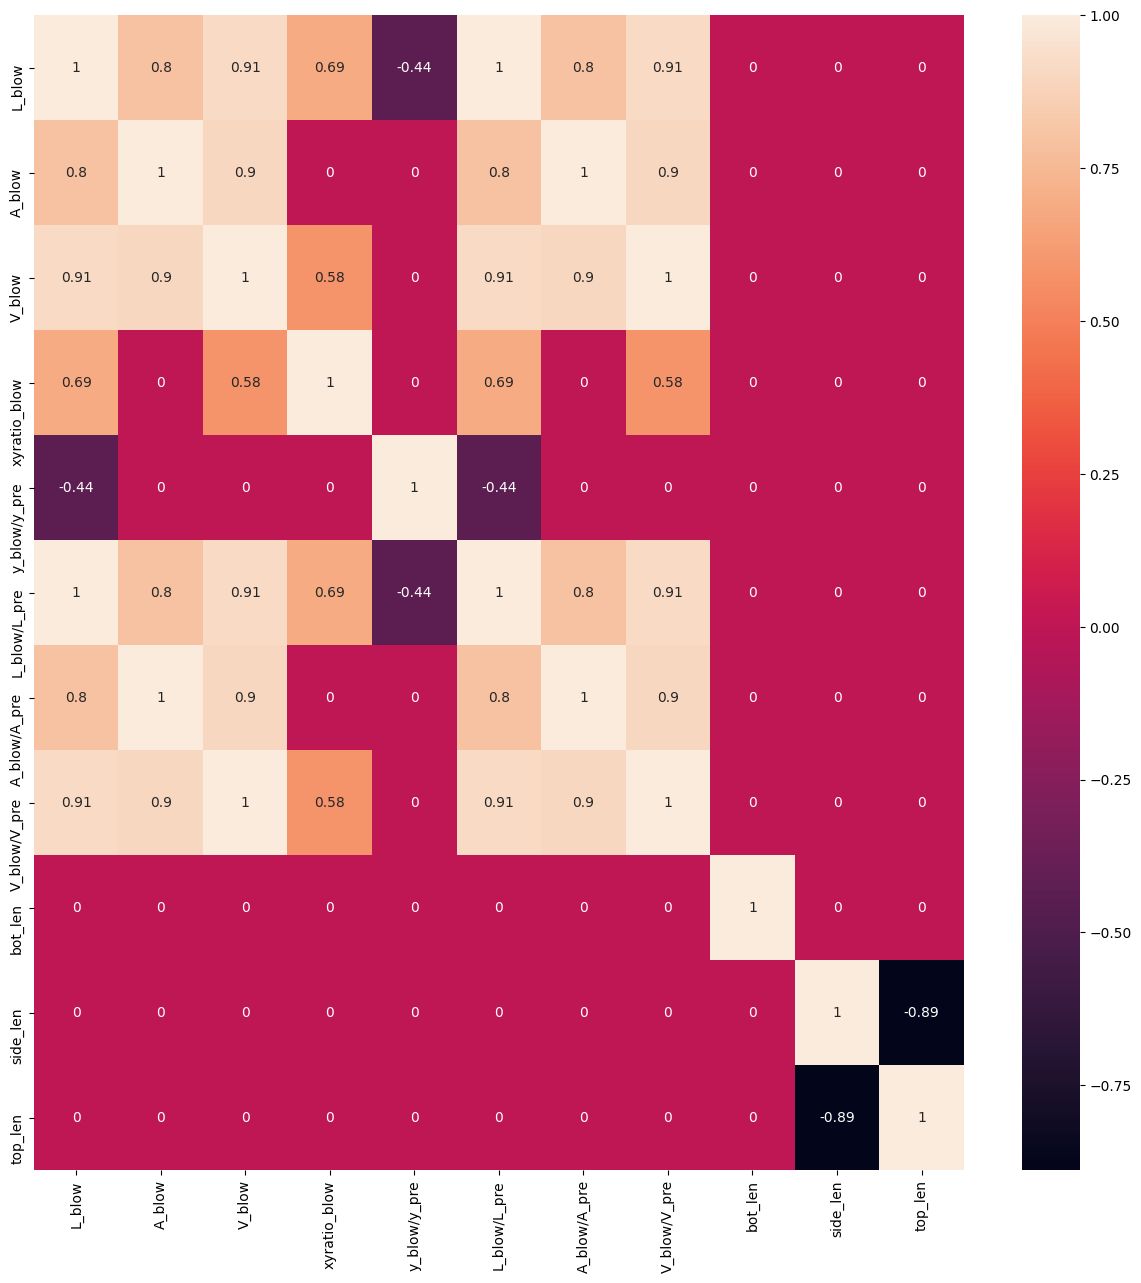

In [77]:
# test 4
path = './factor table/test4_xy_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns[6:]
feature.shape

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

threshold = 0.4
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()


<Figure size 1500x1500 with 0 Axes>

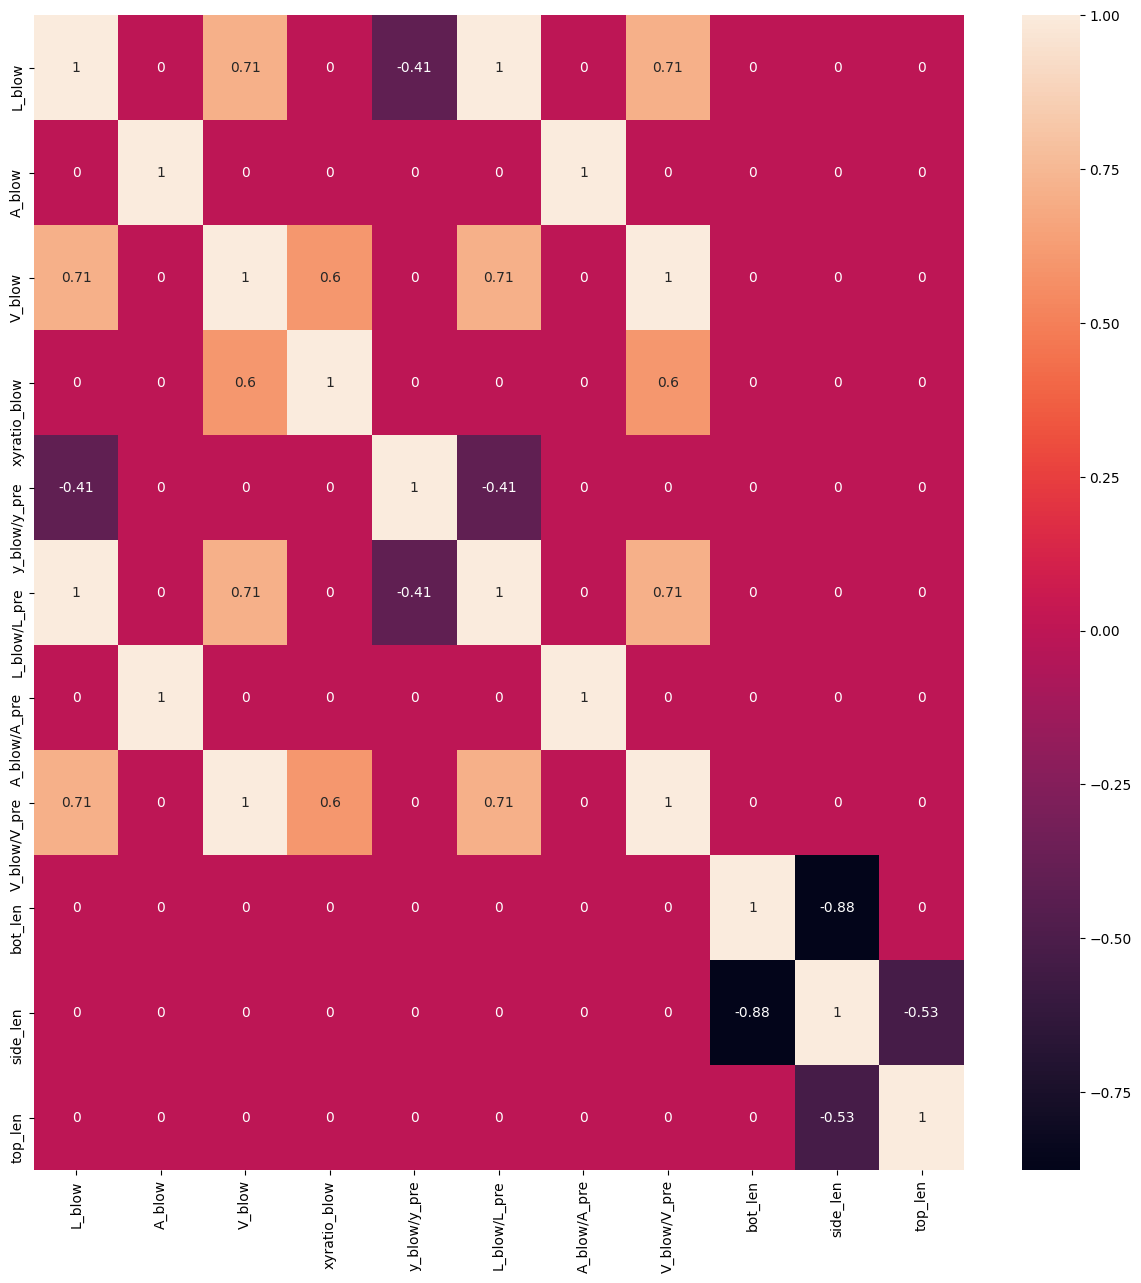

In [78]:
# test 5
path = './factor table/test5_xy_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns[6:]
feature.shape

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

threshold = 0.4
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()
